In [151]:
import warnings
warnings.filterwarnings("ignore")

In [152]:
import matplotlib.pyplot as plt
%matplotlib inline

In [153]:
import math

In [154]:
# imports
import pandas as pd
import numpy as np

# from sklearn.linear_model import LinearRegression  # for ml
import statsmodels.api as sm

# statistical tests
from statsmodels.tsa.stattools import adfuller, kpss  # stationarity
from statsmodels.stats.api import linear_harvey_collier  # linearity
from statsmodels.stats.diagnostic import linear_rainbow  # linearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif  # multicollinearity
from scipy.stats import shapiro, anderson  # normality
from statsmodels.stats.stattools import durbin_watson  # autocorrelation
from statsmodels.stats.diagnostic import acorr_ljungbox, acorr_breusch_godfrey  # autocorrelation
from statsmodels.stats.diagnostic import het_breuschpagan  # heteroscedasticity
from statsmodels.stats.api import het_goldfeldquandt  # heteroscedasticity

# stat graphics
from statsmodels.graphics.regressionplots import plot_ccpr  # partial residuals plot
from statsmodels.graphics.gofplots import qqplot  # qq plot for normality of residuals
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  # autocorrelation plots

In [155]:
df = pd.read_csv("EcommerceCustomers.csv")
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [156]:
df.dropna(inplace=True)

In [157]:
df["Time on App"].fillna(df["Time on App"].mean(), inplace=True)

## Оценка параметров модели

In [158]:
y=df["Yearly Amount Spent"]
X=df[[ "Length of Membership", "Time on App", "Time on Website", 'Avg. Session Length']]

In [159]:
reg_model = sm.OLS(y, X)
reg_model = reg_model.fit()

In [160]:
reg_summary = reg_model.summary()
reg_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          6.146e+04
Date:                 Mon, 01 Jun 2020   Prob (F-statistic):                        0.00
Time:                         17:17:59   Log-Likelihood:                         -2270.3
No. Observations:                  500   AIC:                                      4549.
Df Residuals:                      496   BIC:                                      4565.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership    60.4162      1.022     59.102      0.000      58.408      62.425
Time on App             34.7461      1.011     34.375      0.000      32.760      36.732
Time on Website        -14.1642      0.705    -20.091      0.000     -15.549     -12.779
Avg. Session Length     11.8713      0.763     15.564      0.000      10.373      13.370
==============================================================================
Omnibus:                        0.497   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.605
Skew:                          -0.008   Prob(JB):                        0.739
Kurtosis:                       2.830   Cond. No.                         54.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Для количественной проверки обоснованности модели используется следующий набор статистических тестов:

- Значимость регрессионной модели и коэффициентов: t-критерий, F-критерий; 
- Стационарность переменных и остатков: Augmented Dickey–Fuller тест (ADF), Phillips–Perron тест (PP), Kwiatkowski–Phillips–Schmidt–Shin тест (KPSS);
- Линейность зависимостей между зависимыми и независимыми переменными: partial residuals plot, Ramsey RESET тест;
- Отсутствие мультиколлинеарности: VIF и condition index;
- Нормальность остатков: график Q-Q, тест Шапиро-Уилка, тест Колмогорова-Смирнова, тест Джарка-Бера и тест Андерсона-Дарлинга;
- Отсутствие автокорреляции: графики ACF и PACF, тест Дарбина-Уотсона, тест Бройша-Годфри и тест Юнга-бокса;
- Гомоскедастичность остатков: график остатков против соответствующих значений, тест Бройша-Пагана и тест Голдфельда-Квандта;
- Стабильность коэффициентов регрессии: тесты на прямую и обратную устойчивость, rolling Chow тест
 

In [161]:
# threshold values
p_value_threshold = 0.05
confidence_threshold = 0.01
removal_rate = 0.3  # 30%
number_of_out_of_sample_data = 9

### Значимость

#### Значимость переменных

T-тест

In [162]:
reg_summary.tables[1] 

,coef,std err,t,P>|t|,[0.025,0.975]
Length of Membership,60.4162,1.022,59.102,0.000,58.408,62.425
Time on App,34.7461,1.011,34.375,0.000,32.760,36.732
Time on Website,-14.1642,0.705,-20.091,0.000,-15.549,-12.779
Avg. Session Length,11.8713,0.763,15.564,0.000,10.373,13.370


Коэффициенты регрессии значимы на 5% уровне.

#### Значимость уравнения регрессии

F-тест

In [163]:
reg_summary.tables[0]

Dep. Variable:,Yearly Amount Spent,R-squared (uncentered):,0.998
Model:,OLS,Adj. R-squared (uncentered):,0.998
Method:,Least Squares,F-statistic:,6.146e+04
Date:,"Mon, 01 Jun 2020",Prob (F-statistic):,0.00
Time:,17:17:59,Log-Likelihood:,-2270.3
No. Observations:,500,AIC:,4549.
Df Residuals:,496,BIC:,4565.
Df Model:,4,,
Covariance Type:,nonrobust,,


Значение F-статистики 71.83, p-value = 6.1e-16, следовательно, уравнение регрессии значимо.

### Стационарность

Для модели временных рядов все зависимые переменные, независимые переменные и остатки должны быть проверены на стационарность с помощью теста ADF, теста PP и теста KPSS. Каждая переменная должна пройти не менее 2 стационарных теста. Для каждого стационарного теста зависимая переменная, независимые переменные и остатки должны быть оценены на:

1. zero mean stationarity (только для остатков);
2. single mean stationarity; и
3. determined trend stationarity. 

Determined trend стационарность означает, что переменная содержит тренда ($\beta t$), и процесс становится стационарным после де-трендирования. Для остатков модели обычно проверяется только zero mean стационарность.  

Варианты:

- Если переменная прошла single mean стационарный тест, то она может быть непосредственно использована в модели.  
- Если переменная проходит только determined trend тест, то необходимо четкое обоснование того, почему эта переменная может быть использована в модели.  
- Если уравнение содержит нестационарную переменную, но остатки проходят тест на стационарность, это означает, что переменные коинтегрированы, то есть существует некоторая линейная комбинация множества переменных, которая является стационарной. В этом случае переменные все еще могут использоваться для моделирования при условии, что существует обоснование использования нестационарной переменной. В противном случае модель необходимо реконструировать.  
- Если уравнение содержит нестационарную переменную и остатки также не стационарны, то модель требуется реконструировать.

Для теста ADF и PP нулевая гипотеза состоит в том, что ряд данных имеет единичный корень, т. е. ряд данных нестационарен; в то время как нулевая гипотеза для теста KPSS состоит в том, что ряд данных не имеет единичного корня, поэтому желательно иметь малые p-values для тестов ADF и PP и большие p-values для теста KPSS.


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 35.2+ KB


In [165]:
df.drop(['Email','Address', 'Avatar'], axis='columns', inplace=True)

In [166]:
def get_stationarity_test_results(series, regime, series_name, p_value_threshold=p_value_threshold):
    """
    regime: "none", "mean" or "trend"
    """
    if regime == "none":
        ADFType = "nc"
        KPSSType = "c"
    elif regime == "mean":
        ADFType = "c"
        KPSSType = "c"
    elif regime == "trend":
        ADFType = "ct"
        KPSSType = "ct"
    else:
        print("There is no such regime name")
        return None
    
    adf_result = adfuller(series, regression=ADFType)[1]
    kpss_result = kpss(series, regression=KPSSType)[1]
    outcome = 'Pass' if (adf_result < p_value_threshold and kpss_result > p_value_threshold) else 'Fail'
    
    result = {'series_name': series_name, 'test_regime': regime, 'ADF p-value': adf_result, 
              'KPSS p-value': kpss_result, 'outcome': outcome}
    return result

In [167]:
# residuals
residuals = reg_model.resid
stationarity_residuals = get_stationarity_test_results(residuals, 'none', 'residuals')
stationarity_table = pd.DataFrame([stationarity_residuals])

# data
regimes = ['mean', 'trend']
for column in df.columns:
    for regime in regimes:
        stationarity_result = get_stationarity_test_results(df[column], regime, column)
        stationarity_table = pd.concat([stationarity_table, pd.DataFrame([stationarity_result])], axis=0)

In [168]:
# stationarity tests results table
columns_right_order = ['series_name', 'test_regime', 'ADF p-value', 'KPSS p-value', 'outcome']
stationarity_table = stationarity_table[columns_right_order]
stationarity_table.index = list(range(len(df.columns) * 2 +1))
stationarity_table

,series_name,test_regime,ADF p-value,KPSS p-value,outcome
0,residuals,none,0.000000e+00,0.100000,Pass
1,Avg. Session Length,mean,0.000000e+00,0.100000,Pass
2,Avg. Session Length,trend,0.000000e+00,0.100000,Pass
3,Time on App,mean,0.000000e+00,0.100000,Pass
4,Time on App,trend,0.000000e+00,0.100000,Pass
5,Time on Website,mean,2.626731e-30,0.026614,Fail
6,Time on Website,trend,0.000000e+00,0.100000,Pass
7,Length of Membership,mean,0.000000e+00,0.087310,Pass
8,Length of Membership,trend,0.000000e+00,0.100000,Pass
9,Yearly Amount Spent,mean,3.321112e-22,0.092099,Pass


Переменные и остатки модели проходят тесты на стационарность.

### Линейность модели

Модели OLS предполагают линейность между независимыми и зависимыми переменными. Ниже приведены два метода проверки линейности.

#### Partial Residuals Plot

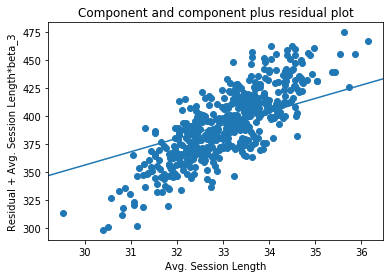

In [176]:
plot_ccpr(reg_model, df.columns[0])
plt.show()

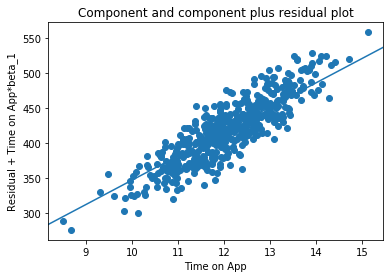

In [177]:
plot_ccpr(reg_model, df.columns[1])
plt.show()

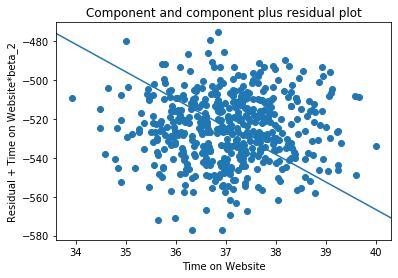

In [178]:
plot_ccpr(reg_model, df.columns[2])
plt.show()

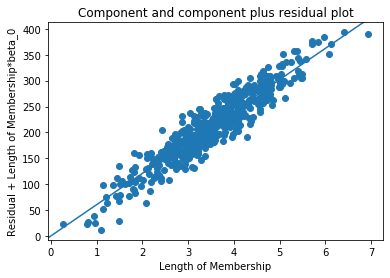

In [179]:
plot_ccpr(reg_model, df.columns[3])
plt.show()

#### Тесты на линейность

In [184]:
# Rainbow test
rainbow_pvalue = linear_rainbow(reg_model)[1]
rainbow_outcome = 'Pass' if rainbow_pvalue > p_value_threshold else 'Fail'
print('p-value of Rainbow test {}, outcome: {}'.format(rainbow_pvalue, rainbow_outcome))

# Harvey-Collier test
hc_pvalue = linear_harvey_collier(reg_model)[1]
hc_outcome = 'Pass' if hc_pvalue > p_value_threshold else 'Fail'
print('p-value of Harvey-Collier test {}, outcome: {}'.format(hc_pvalue, hc_outcome))

p-value of Rainbow test 0.5359439547588245, outcome: Pass
p-value of Harvey-Collier test nan, outcome: Fail


### Мультиколлинеарность независимых переменных

#### Variance Inflation Factor (VIF)

In [185]:
X_cor = X.corr()
inv_cor_data = pd.DataFrame(np.linalg.inv(X.corr().values), index = X_cor.index, columns=X_cor.columns)
vif_result = pd.DataFrame(data=np.diag(inv_cor_data), index=X.columns, columns=['VIF'])
vif_result

,VIF
Length of Membership,1.006949
Time on App,1.008684
Time on Website,1.010275
Avg. Session Length,1.005422


#### Condition Index

In [187]:
eig_vals = np.linalg.eigvals(np.dot(np.transpose(X), X))

In [188]:
cond_ind_result = pd.DataFrame(data=np.sqrt(max(eig_vals) ** 2 / eig_vals), index=X.columns, columns=['Condition Index'])
cond_ind_result

,Condition Index
Length of Membership,1145.584744
Time on App,62440.708989
Time on Website,58606.006908
Avg. Session Length,55753.581039


Index > 30. Признаки мультиколлинеарности в модели  наблюдается?

### Нормальность остатков

#### Q-Q Plot for Residuals

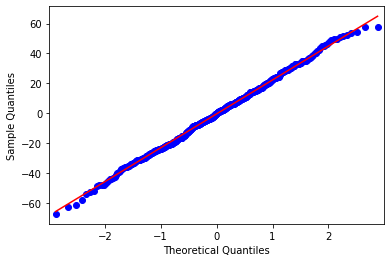

In [189]:
qqplot(reg_model.resid, line='s')
plt.show()

#### Тесты на нормальность остатков

In [190]:
_, shapiro_pvalue = shapiro(reg_model.resid)
shapiro_pvalue = round(shapiro_pvalue, 2)
shapiro_outcome = 'Pass' if shapiro_pvalue > p_value_threshold else 'Fail'
print('p-value of Shapiro Normality test {}, outcome: {}'.format(shapiro_pvalue, shapiro_outcome))

p-value of Shapiro Normality test 0.75, outcome: Pass


In [191]:
result = anderson(reg_model.resid)
print('Statistic: %.3f' % result.statistic)
for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
    else:
        print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 0.208
15.000: 0.571, data looks normal (fail to reject H0)
10.000: 0.651, data looks normal (fail to reject H0)
5.000: 0.781, data looks normal (fail to reject H0)
2.500: 0.911, data looks normal (fail to reject H0)
1.000: 1.083, data looks normal (fail to reject H0)


По результатам тестирования остатки регрессионной модели распределены нормально.

### Автокорреляция в остатках

#### ACF and PACF plots

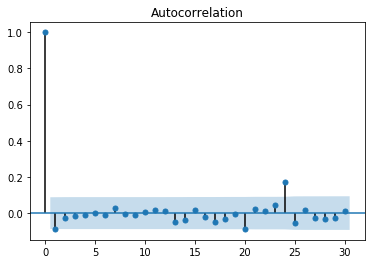

In [192]:
plot_acf(reg_model.resid, lags=30)
plt.show()

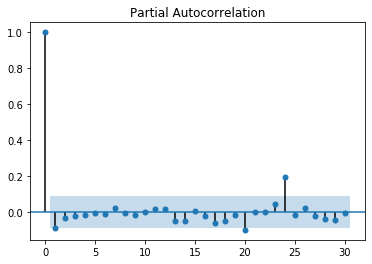

In [193]:
plot_pacf(reg_model.resid, lags=30)
plt.show()

Ряд PACF ACF немного недифференцированный?

#### Тесты на автокорреляцию в остатках

In [194]:
# Durbin-Watson test
autocorrelation_results = pd.DataFrame(columns=['Autocorrelation test', 'lag', 'p-value / DW statistic value', 'outcome'])
autocorrelation_results.loc[0] = ['Durbin-Watson', 'NA', durbin_watson(reg_model.resid), 'Pass']

# Breusch-Godfrey test
for lag in range(1, 5):
    tmp_res = acorr_breusch_godfrey(reg_model, nlags=lag)[3]
    autocorrelation_results.loc[lag] = ['Breusch-Godfrey', lag, tmp_res, 'Pass' if tmp_res > p_value_threshold else 'Fail']

# Ljung-Box test
for lag in range(1, 5):
    tmp_res = acorr_ljungbox(reg_model.resid, lags=lag)[1][0]
    autocorrelation_results.loc[lag + 4] = ['Breusch-Godfrey', lag, tmp_res, 'Pass' if tmp_res > p_value_threshold else 'Fail']

autocorrelation_results 

,Autocorrelation test,lag,p-value / DW statistic value,outcome
0,Durbin-Watson,NA,2.160163,Pass
1,Breusch-Godfrey,1,0.954542,Pass
2,Breusch-Godfrey,2,0.687813,Pass
3,Breusch-Godfrey,3,0.844063,Pass
4,Breusch-Godfrey,4,0.935507,Pass
5,Breusch-Godfrey,1,0.053778,Pass
6,Breusch-Godfrey,2,0.053778,Pass
7,Breusch-Godfrey,3,0.053778,Pass
8,Breusch-Godfrey,4,0.053778,Pass


Тестовая статистика для теста Дарбина-Уотсона приблизительно равна 2*(1-r), где r-выборочная автокорреляция остатков. Таким образом, для r == 0, указывающего на отсутствие серийной корреляции, тестовая статистика равна 2. Эта статистика всегда будет находиться между 0 и 4. Чем ближе к 0 статистика, тем больше доказательств положительной серийной корреляции. Чем ближе к 4, тем больше свидетельств отрицательной серийной корреляции.

Таким образом, остатки регрессии не являются автокоррелированными.

### Гетероскедастичность остатков

#### Residuals vs fitted Values Plot

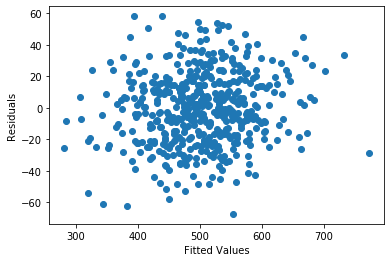

In [195]:
plt.scatter(reg_model.fittedvalues, reg_model.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

График обеспечивает визуализированное исследование на наличие гетероскедастичности. Гомоскедастичность может быть принята, если остатки модели случайным образом разбросаны вокруг нуля и нет систематической закономерности относительно fitted values.

In [196]:
# Breush-Pagan test
bp_pvalue = het_breuschpagan(reg_model.resid, X)[3]
bp_outcome = 'Pass' if bp_pvalue > p_value_threshold else 'Fail'
print('p-value of Breush-Pagan test {}, outcome: {}'.format(bp_pvalue, bp_outcome))

# Goldfeld-Quandt test
gq_pvalue = het_goldfeldquandt(reg_model.resid, X)[1]
gq_outcome = 'Pass' if gq_pvalue > p_value_threshold else 'Fail'
print('p-value of Goldfeld-Quandt test {}, outcome: {}'.format(gq_pvalue, gq_outcome))

p-value of Breush-Pagan test 2.248072140155548e-46, outcome: Fail
p-value of Goldfeld-Quandt test 0.02208184093190781, outcome: Fail


По итогам анализа графика и результатов тестов, остатки НЕ могут считаться гомоскедастичными.

### Стабильность коэффициентов регрессионной модели


#### Backward stability

In [202]:
coeff_1_backward = pd.DataFrame(data=np.zeros((removed_len, 4)), columns=['lower', 'rolling', 'upper', 'actual'])
coeff_2_backward = pd.DataFrame(data=np.zeros((removed_len, 4)), columns=['lower', 'rolling', 'upper', 'actual'])
for idx in range(removed_len, -1, -1):
    temp_reg_model = sm.OLS(y[idx:], X.iloc[idx:, :]).fit()
    conf_int = temp_reg_model.conf_int(confidence_threshold)
    
    coeff_1_backward.loc[removed_len - idx] = [conf_int.iloc[0, 0], 
                                                      temp_reg_model.params[0], conf_int.iloc[0, 1], reg_model.params[0]]
    coeff_2_backward.loc[removed_len - idx] = [conf_int.iloc[1, 0], 
                                                      temp_reg_model.params[1], conf_int.iloc[1, 1], reg_model.params[1]]

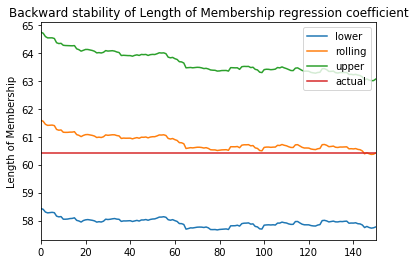

In [203]:
coeff_1_backward.plot()
plt.ylabel(X.columns[0])
plt.title('Backward stability of ' + X.columns[0] + ' regression coefficient')
plt.show()

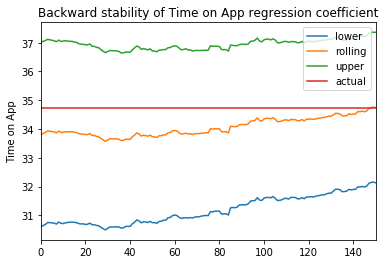

In [204]:
coeff_2_backward.plot()
plt.ylabel(X.columns[1])
plt.title('Backward stability of ' + X.columns[1] + ' regression coefficient')
plt.show()

На основании полученных графиков можно сделать вывод, что конечные коэффициенты регрессии находятся в пределах доверительных интервалов, что свидетельствует об устойчивости коэффициентов регрессии.

### Performance Testing

In [205]:
in_sample_X = X.iloc[:X.shape[0] - number_of_out_of_sample_data, :]
in_sample_y = y[:len(y) - number_of_out_of_sample_data]

out_of_sample_X = X.iloc[X.shape[0] - number_of_out_of_sample_data:, :]
out_of_sample_y = y[len(y) - number_of_out_of_sample_data:]

# in-sample regression
reg_model_in_sample = sm.OLS(in_sample_y, in_sample_X).fit()

In [206]:
# get predictions
predictions = reg_model_in_sample.get_prediction(out_of_sample_X)
predictions = predictions.summary_frame(alpha=0.05)

In [209]:
performance_df = pd.DataFrame(index=df.index.values, columns=[df.columns[0], 'fitted',
                                                                                           'lower bound', 'upper_bound'])
performance_df.iloc[:, 0] = df.iloc[:, 0]
performance_df.iloc[:df.shape[0] - number_of_out_of_sample_data, 1] = reg_model_in_sample.fittedvalues
performance_df.iloc[df.shape[0] - number_of_out_of_sample_data:, 1] = predictions.iloc[:, 0]
performance_df.iloc[df.shape[0] - number_of_out_of_sample_data:, 2] = predictions.iloc[:, -2]
performance_df.iloc[df.shape[0] - number_of_out_of_sample_data:, 3] = predictions.iloc[:, -1]

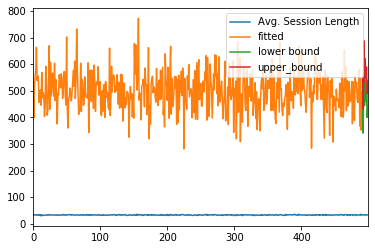

In [210]:
performance_df.plot()
plt.show()

In [213]:
# in-sample performance metrics
n = df.shape[0] - number_of_out_of_sample_data
mae_in_sample = (1 / n) * sum([abs(in_sample_y[idx] - reg_model_in_sample.fittedvalues[idx]) for idx in range(n)])
mar_in_sample = (1 / (n - 1)) * sum([abs(in_sample_y[idx] - in_sample_y[idx - 1]) for idx in range(1, n)])

rmse_in_sample = math.sqrt((1 / n) * sum([abs(in_sample_y[idx] - 
                                              reg_model_in_sample.fittedvalues[idx])**2 for idx in range(n)]))
sd_in_sample = math.sqrt((1 / n) * sum([abs(in_sample_y[idx] - 
                                              np.mean(in_sample_y))**2 for idx in range(n)]))
ceerpct_in_sample = abs((reg_model_in_sample.fittedvalues.sum() - in_sample_y.sum()) / in_sample_y.sum())

print('MAE in sample: ', round(mae_in_sample, 3))
print('MAR in sample: ', round(mar_in_sample, 3))
print('MAE / MAR in sample: ', round(mae_in_sample / mar_in_sample, 3))
print('RMSE in sample: ', round(rmse_in_sample, 3))
print('SD in sample: ', round(sd_in_sample, 3))
print('RMSE / SD in sample: ', round(rmse_in_sample / sd_in_sample, 3))
print('CEERPCT in sample: ', round(ceerpct_in_sample, 3))

MAE in sample:  18.318
MAR in sample:  92.626
MAE / MAR in sample:  0.198
RMSE in sample:  22.813
SD in sample:  79.487
RMSE / SD in sample:  0.287
CEERPCT in sample:  0.001


Performance модели является приемлемым

### Проверка входных данных

#### Визуальная инспекция

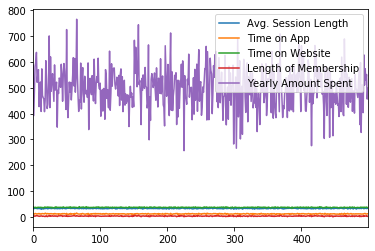

In [216]:
for column in df.columns:
    df[column].plot()
plt.legend(df.columns)
plt.show()

### Базовые статистики

In [217]:
# descriptive statistics
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### High Influential points

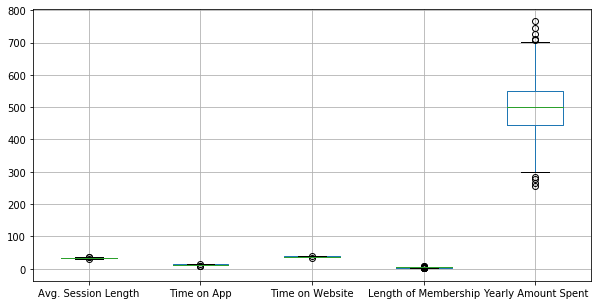

In [258]:
df.boxplot(figsize=(10,5))
plt.show()

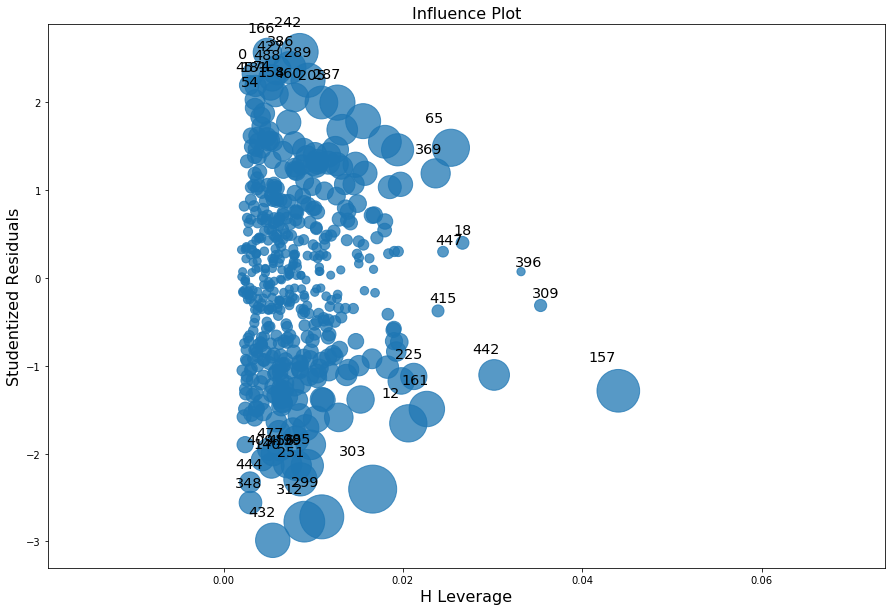

In [222]:
fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.influence_plot(reg_model, ax=ax, criterion="cooks")

### Influence measures

In [259]:
from statsmodels.stats import outliers_influence

In [260]:
result = outliers_influence.OLSInfluence(reg_model).summary_frame()
result

,dfb_Length of Membership,dfb_Time on App,dfb_Time on Website,dfb_Avg. Session Length,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.041708,-0.014574,0.064783,-0.061628,4.398433e-03,2.313980,0.003275,0.132641,2.324226,0.133229
1,0.008297,0.009513,-0.013942,0.008202,1.060679e-04,-0.258951,0.006287,-0.020598,-0.258708,-0.020578
2,-0.024455,0.029727,-0.013075,0.001082,7.541713e-04,-0.890339,0.003791,-0.054924,-0.890152,-0.054913
3,-0.036251,0.095168,-0.092863,0.057862,4.519167e-03,1.305921,0.010488,0.134449,1.306852,0.134545
4,0.037590,0.024597,-0.002721,-0.012659,1.021750e-03,0.976386,0.004269,0.063930,0.976340,0.063927
5,-0.099030,-0.020160,0.120688,-0.103239,6.950339e-03,-1.172578,0.019819,-0.166737,-1.173022,-0.166801
6,-0.043125,0.018016,-0.022535,0.019502,8.724013e-04,-0.746895,0.006217,-0.059073,-0.746562,-0.059047
7,-0.011795,-0.002828,-0.004557,0.007262,8.618232e-05,-0.284864,0.004230,-0.018567,-0.284600,-0.018550
8,-0.028775,0.079584,-0.049083,0.019434,3.183223e-03,1.561748,0.005193,0.112840,1.564023,0.113005
9,0.012261,0.006984,-0.052177,0.046605,1.549186e-03,-1.310542,0.003595,-0.078719,-1.311493,-0.078777


#### DFFITS

In [262]:
df.shape

(500, 5)

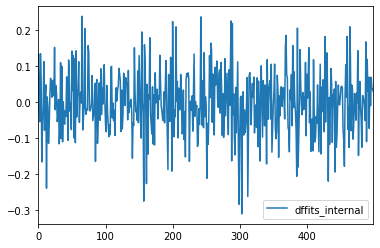

In [266]:
result[['dffits_internal']].plot();

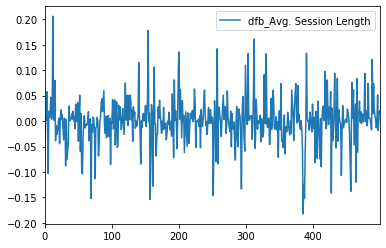

In [268]:
result[['dfb_Avg. Session Length']].plot();

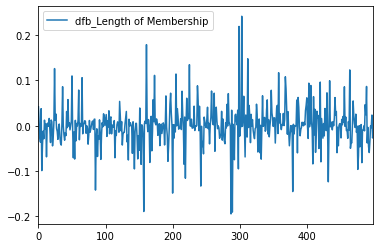

In [269]:
result[['dfb_Length of Membership']].plot();

### Cook's distance

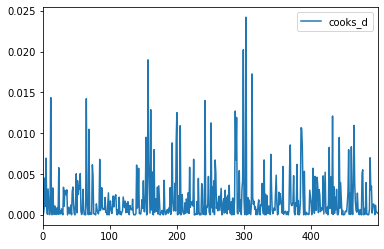

In [265]:
result[['cooks_d']].plot();